# Project 3 --- Where the government money goes in Austin?


## Group Member:
### Rongchu Zhao
### Rithvik Mundra
### Soomin Park
### Szu-Ying Yang

## Part 1 - Select Data: Austin Finance eCheckbook data

## Why this data?

### Austin Finance Online eCheckbook data. 

We decided to use the Austin Finance Online eCheckbook data, this data provides details on the city’s expenditure on different purposes. The data in the eCheckbook represents purchases of goods and services made by City departments from third parties. According to the Austin government website, the transactions that related to energy have been excluded because of the regulation.
The data source is https://data.austintexas.gov/Financial/Austin-Finance-Online-eCheckbook/8c6z-qnmj. 
### Reason of choosing the dataset:
First, Austin is one of the largest city in Texas and they provide thorough information about government spending, so we are thrilled to have the opportunity to analyze the data and see the picture of what the government has done with tax collected from the taxpayers. 
Second, we did crime and property related topics in previous assignment, hence this time we want to do something different and more financial related topic. Therefore, we choose the spending data as our topic this time.  
Furthermore, we checked spending data in other cities and found that this dataset leaves more room for us to do some wrangling and analysis, so it will be challenging and interesting.
At last, because this data is recorded as the each check was spend on specific purchase that performed by government, so we think each record represents individual transaction, which meets the requirement of data set choosing. 

In [5]:
!wget https://data.austintexas.gov/api/views/8c6z-qnmj/rows.csv?accessType=DOWNLOAD

--2016-12-09 00:43:42--  https://data.austintexas.gov/api/views/8c6z-qnmj/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.68.26
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [              <=>   ] 354.92M  3.23MB/s    in 2m 5s   

Last-modified header invalid -- time-stamp ignored.
2016-12-09 00:45:48 (2.85 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [372162617]



Now renaming the downloaded file to austin_data.csv.


In [6]:
!mv rows.csv?accessType=DOWNLOAD austin_data.csv

Observing the column names in the datset.

In [7]:
!csvcut -n austin_data.csv

  1: FY_DC
  2: PER_CD
  3: DEPT_CD
  4: DEPT_NM
  5: FUND_CD
  6: FUND_NM
  7: DIV_CD
  8: DIV_NM
  9: GP_CD
 10: GP_NM
 11: OCAT_CD
 12: OCAT_NM
 13: OBJ_CD
 14: OBJ_NM
 15: LGL_NM
 16: VEND_CUST_CD
 17: VEND_CUST_IND
 18: RFED_DOC_CD
 19: RFED_DOC_DEPT_CD
 20: RFED_DOC_ID
 21: COMM_CD
 22: COMM_DSCR
 23: CHK_EFT_ISS_DT
 24: CVL_CHK_STA_DV
 25: RFED_VEND_LN_NO
 26: RFED_COMM_LN_NO
 27: RFED_ACTG_LN_NO
 28: RF_DOC_CD
 29: RF_DOC_DEPT_CD
 30: RF_DOC_ID
 31: ACTG_LN_DSCR
 32: AMOUNT
 33: CAL_YEAR
 34: CAL_MONTH


### Column Description:
    1. FY_DC: Fiscal Year, from Oct.1-Sep.30    
    2. PER_CD: Fiscal Month, start from Oct to Sept. 
    3. DEPT_CD: Department code (A department is a primary organizational unit used by the city of Austin.)  
    4. DEPT_NM: Department name    
    5. FUND_CD: Fund code. Funds help organize the City's finances.  
    6. FUND_NM: Fund name   
    7. DIV_CD: Division code / Program Code (A program is the secondary organizational unit used by the City of Austin.)    
    8. DIV_NM: Division name / Program Name    
    9. GP_CD: Group Code/Activity Code, which is a sub-group under programs that further segregates the organization to track the City of Austin's functions and expenses.    
    10. GP_NM: Group Name/Activity Name    
    11. OCAT_CD: Object Category, which is a high level grouping of expenses.    
    12. OCAT_NM: Object Category Name    
    13. OBJ_CD: Object code, which is identification code associated with an object of expenditure.    
    14. OBJ_NM: Object name    
    15. LGL_NM: The legally defined name of the company or individual.    
    16. VEND_CUST_CD: Vendor identification number with the City.   
    17. VEND_CUST_IND: Vendor/Customer indicator.    
    18. RFED_DOC_CD: Referenced document code, which is the actual payment document code.    
    19. RFED_DOC_DEPT_CD: Referenced document department, that created the payment document, code.   
    20. RFED_DOC_ID: Referenced document identification number.    
    21. COMM_CD: Commodity code
    22. COMM_DSCR: Commodity description
    23. CHK_EFT_ISS_DT: Check issued date
    24. CVL_CHK_STA_DV: Check status (either show Paid or Outstanding)
    25. RFED_VEND_LN_NO: Referenced vendor line number
    26. RFED_COMM_LN_NO: Referenced commodity line number
    27. RFED_ACTG_LN_NO: Referenced accounting line number
    28. RF_DOC_CD: Referenced document code
    29. RF_DOC_DEPT_CD: Referenced document department code
    30. RF_DOC_ID: Referenced document identification number
    31. ACTG_LN_DSCR: Accounting Line Description
    32. AMOUNT: Payment amount
    33. CAL_YEAR: Calendar Year (from Jan.1 - Dec.31)
    34. CAL_MONTH: Calendar Month

### Questions we want to be able to answer with the data
How is the government expenditure being distributed among each category? For example, among each organization, or object, or specific funds or etc.
We want to visualize the government spending information to check if there is any seasonality in the spending?
What kind of expenditure are most likely to result in outstanding check. For example which kind of object type, of program, of division, or etc.

### Challenges and Concerns:
The data is thoroughly recorded, so in future we have to figure out how to set up the star schema, like which columns should formed as one dimension table and etc. 

Second, some columns has missing value issues, so we have to deal with it. 

Third, we found some columns may referenced to another table, which is not related to our analysis, so we have to decided how to handle these columns. 

Then, there are some description columns include similar information, such as the column Accounting line description and column Commodity description, so we will decide to choose which one. 

Furthermore, some categorical columns are include too many categories, for example the column Fund_Name so it will be difficult to show an interesting trend by grouping them. 

Finally, the original data includes more than 1000,000 records, which is relatively burdensome for us and for notebook and VMware. In order to do the analysis smoothly we will reduce the amount of the data. 

Now we are finding the number of rows in the data.

In [8]:
!wc -l austin_data.csv

1106654 austin_data.csv


### Filtering :    
As we mentioned earlier, we have to take a subset of the data. The original data is recorded from 2009 to 2016, we want to analyze the most recent data so we  select only three years from 2014-2016. 

In [1]:
!csvgrep -c1 -m '2014' austin_data.csv > austin.csv

In [2]:
!csvgrep -c1 -m '2015' austin_data.csv | sed 1d >> austin.csv

In [3]:
!csvgrep -c1 -m '2016' austin_data.csv | sed 1d >> austin.csv

When appending other years to the three years csv file, we need to get rid of the first header line by using the sed command.

Now checking the number of rows in the new dataset.

In [4]:
!wc -l austin.csv

390288 austin.csv


We feel that 390k records of data is a good amount of data to work on for the project 3.

## Part2 - Wrangling

We use csvstat to get an idea about our dataset.

In [10]:
!csvstat austin.csv

  1. FY_DC
	<class 'int'>
	Nulls: False
	Values: 2016, 2014, 2015
  2. PER_CD
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 12
	Sum: 2525257
	Mean: 6.47025650354739
	Median: 6
	Standard Deviation: 3.4509658782260613
	Unique values: 12
	5 most frequent values:
		1:	40565
		6:	36605
		11:	35201
		10:	34643
		9:	34298
  3. DEPT_CD
	<class 'int'>
	Nulls: False
	Min: 11
	Max: 94
	Sum: 20172240
	Mean: 51.6856569652589
	Median: 62
	Standard Deviation: 30.133110925669527
	Unique values: 46
	5 most frequent values:
		11:	67918
		22:	56163
		86:	28697
		62:	22767
		78:	21959
  4. DEPT_NM
	<class 'str'>
	Nulls: False
	Unique values: 46
	5 most frequent values:
		Austin Energy:	67918
		Austin Water Utility:	56163
		Parks & Recreation:	28697
		Public Works - Transportation:	22767
		Fleet Services:	21959
	Max length: 40
  5. FUND_CD
	<class 'str'>
	Nulls: False
	Unique values: 237
	5 most frequent values:
		1000:	77888
		5010:	32327
		5150:	24602
		5540:	20173
		5120:	19116
	Max length: 4
  6. FUND_NM


### Challenges and Concerns:
The data is thoroughly recorded, so in future we have to figure out how to set up the star schema, like which columns should formed as one dimension table and etc. 

Second, some columns has missing value issues, so we have to deal with it. 

Third, we found some columns may referenced to another table, which is not related to our analysis, so we have to decided how to handle these columns. 

Then, there are some description colunms include similar information, such as the column Accounting line description and column Commodity description, so we will decide to choose which one. 

Furthermore, some categorical columns are include too many categories, for example the column Fund_Name so it will be difficult to show an insteresting trend by grouping them. 

Fianlly, the original data includes more than 1000,000 records, which is relatively burdensome for us and for notebook and VM-vare. In order to do the analysis smoothly we will reduce the amount of the data. 

### Cleaning: 
#### missing value in column: 
    1. COMM_CD : 85604 missing 
    2. COMM_DSCR : 85604 missing 
    3. RF_DOC_CD : 86356 missing 
    4. RF_DOC_DEPT_CD : 86356 missing 
    5. RF_DOC_ID : 86356 missing 
#### deleting the columns:
    1. Column 'VEND_CUST_IND', which is the Vendor or Costomer indicator. In our database, all records are recorded as V,which stands for Vendor, so will not provide some useful information by analyzing this column.The column number for 'VEND_CUST_IND' is 17.

In [12]:
!csvcut -c 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34 austin.csv >austin_clean.csv 

Actually we tried using 'cut' to cut the column we do not need, but turns out it will mess up our data. So we use 'csvcut' choosing the column we need and just left the one that we want to delete.

Now we will connect to the POSTGRESql server

In [2]:
%load_ext sql

//anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


If you are using a VM please proceed with the following code to connect to POSTGREsql server


In [2]:
!createdb -U dbuser project3

In [ ]:
%sql postgresql://dbuser@localhost:5432/project3

If you are using DATANOTEBOOK.ORG please proceed with the following code to connect to POSTGREsql server

In [ ]:
!echo 'redspot' | sudo -S service postgresql restart

In [ ]:
!createdb -U dbuser project3

In [ ]:
%sql postgresql://dbuser@localhost:5432/project3

Now we create an empty table named austin and load the data from the file austin_clean.csv to the austin table.

In [45]:
%%sql
DROP TABLE IF EXISTS austin;
CREATE TABLE AUSTIN(
    fy_dc INTEGER,
    per_cd INTEGER,
    dept_cd INTEGER,
    dept_nm VARCHAR(50),
    fund_cd VARCHAR(15),
    fund_nm VARCHAR(60),
    div_cd VARCHAR(10),
    div_nm VARCHAR(60),
    gp_cd CHAR (10),
    gp_nm VARCHAR(60),
    ocat_cd INTEGER,
    ocat_nm VARCHAR(70),
    obj_cd VARCHAR(15),
    obj_nm VARCHAR(50),
    lgl_nm VARCHAR(65),
    vend_cust_cd VARCHAR(20),
    rfed_doc_cd VARCHAR(15),
    rfed_doc_dept_cd INTEGER,   
    rfed_doc_id VARCHAR(25),
    comm_cd VARCHAR(15),
    comm_descr VARCHAR(65),
    chk_eft_iss_dt DATE,
    cvl_chk_sta_dv VARCHAR(15),
    rfed_vend_ln_no INTEGER,
    rfed_comm_ln_no INTEGER,
    rfed_actg_ln_no INTEGER,
    rf_doc_cd VARCHAR(20),
    rf_doc_dept_cd INTEGER,
    rf_doc_id VARCHAR(25),
    actg_ln_dscr VARCHAR(60),
    amount MONEY,
    cal_year INTEGER,
    cal_month INTEGER
);

Done.
Done.


[]

In [46]:
!pwd

/Users/zhaorc/Desktop


In [47]:
%%sql

COPY austin FROM '/Users/zhaorc/Desktop/austin_clean.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

390287 rows affected.


[]

In [48]:
%%sql

SELECT * from austin
LIMIT 10;

10 rows affected.


fy_dc,per_cd,dept_cd,dept_nm,fund_cd,fund_nm,div_cd,div_nm,gp_cd,gp_nm,ocat_cd,ocat_nm,obj_cd,obj_nm,lgl_nm,vend_cust_cd,rfed_doc_cd,rfed_doc_dept_cd,rfed_doc_id,comm_cd,comm_descr,chk_eft_iss_dt,cvl_chk_sta_dv,rfed_vend_ln_no,rfed_comm_ln_no,rfed_actg_ln_no,rf_doc_cd,rf_doc_dept_cd,rf_doc_id,actg_ln_dscr,amount,cal_year,cal_month
2014,11,93,Emergency Medical Services,1000,General Fund,5BSV,Billing Services,5BLS,Billing Services,152,Contractual Services,5860,Services-other,GMSL CONSULTING LLC,VC0000102791,PRM,9300,14082134394,96671,"Paper Cutting, Drilling, Folding, Punching, Shredd",0014-08-24,Paid,1,2,1,DO,9300,14081818973,"Paper Cutting, Drilling, Folding, Punching, Shredd",$306.00,2014,8
2014,8,22,Austin Water Utility,5220,Water Inventory Fund,ZZZZ,Miscellaneous,ZZZZ,Miscellaneous,154,Commodities/Other,7730,Inventory purchases,W W GRAINGER INC,WWG2097000,PRM,2200,14051923636,20027100001,"GLOVES WORK RBR NEOPRENE COATED 14""LONG GAUNTLET",0014-05-22,Paid,1,22,1,DO,2200,14042312106,"GLOVES WORK RBR NEOPRENE COATED 14""LONG GAUNTLET",$93.60,2014,5
2014,8,63,Watershed,5100,Drainage Utility Fund,63FC,Flood Hazard Mitigation,52WM,Watershed Management,152,Contractual Services,6406,Telephone equipment,USA MOBILITY WIRELESS INC,VC0000100379,PRM,6300,14052023824,91505,Answering/Paging Services,0014-05-23,Paid,1,1,14,DO,6300,14051213114,Answering/Paging Services,$14.32,2014,5
2014,11,63,Watershed,5100,Drainage Utility Fund,63WM,Infrastructure & Waterway Maintenance,42SM,Storm Water Management,152,Contractual Services,6175,Garbage/refuse collection,973 MATERIALS LLC,VC0000102565,PRM,6300,14080732787,96871,Solid or Liquid Waste Disposal (Including Manageme,0014-08-10,Paid,1,1,1,DO,6300,14080518158,Solid or Liquid Waste Disposal (Including Manageme,$42.00,2014,8
2014,11,22,Austin Water Utility,5220,Water Inventory Fund,ZZZZ,Miscellaneous,ZZZZ,Miscellaneous,154,Commodities/Other,7730,Inventory purchases,W W GRAINGER INC,WWG2097000,PRM,2200,14081933852,44591104050,WRENCH PIPE OFFSET 90DEG 14 INCH,0014-08-22,Paid,1,30,1,PO,2200,14073104820,WRENCH PIPE OFFSET 90DEG 14 INCH,$169.89,2014,8
2014,8,63,Watershed,4850,Drainage Cip,6400,Flood Control Improvements,6443,Northwest Park ID 1454,152,Contractual Services,5590,Services-engineering,FREESE & NICHOLS INC,FRE1930500,PRM,6100,14050522003,92523,Dam Engineering,0014-05-08,Paid,1,2,1,DO,6100,13061916054,Dam Engineering,"$5,936.00",2014,5
2014,10,74,Financial Services,5150,Support Services Fund,9MGT,Support Services,9ADM,Departmental Support Services,154,Commodities/Other,7100,Purch.card costs to reclassify,TW TELECOM,VC0000100864,PRM,8100,14063028050,91577,"Telephone Services, Long Distance and Local (Inclu",0014-07-05,Paid,1,1,1,DO,8100,13102101727,"Telephone Services, Long Distance and Local (Inclu","$10,191.66",2014,7
2014,12,72,Neighborhood Housing,6144,US Housing/Urban Development-CDBG,1HSG,Housing,2HOA,Homeowner Assistance,152,Contractual Services,5558,Services-closing/title insur,ITCOA LLC,IND8317166,GAX,7200,14092421586,None,None,0014-09-28,Paid,1,0,1,None,None,None,Services-closing/title insur,"$1,357.10",2014,9
2014,11,15,Solid Waste Services,5040,Austin Resource Recovery Fund,5DVS,Waste Diversion,5ZRW,Zero Waste,152,Contractual Services,5860,Services-other,EMPLOYEE OWNED NURSERY ENTERPRISES LTD,EMP8321200,PRM,1500,14082534500,92442,"INSTRUCTORS, CLASSES FOR THE PUBLIC",0014-08-28,Paid,1,1,1,DO,1500,14030709292,"INSTRUCTORS, CLASSES FOR THE PUBLIC",$75.00,2014,8
2014,11,16,Code Compliance,7050,Austin Code Fund,2CLR,Licensing and Registration Compliance,2LRC,Licensing & Registration Compliance,152,Contractual Services,6407,Telephone-cellular phones,USA MOBILITY WIRELESS INC,VC0000100379,PRM,1600,14073131986,91505,Answering/Paging Services,0014-08-03,Paid,1,3,1,DO,1600,14072917755,Answering/Paging Services,$39.42,2014,8


After checking the table we created, we feel that the data loaded well and hence we proceed with this table for analyzing the Austin spending data.

When we checked the columns 'actg_ln_dscr' and 'comm_descr' and result showed that actg_ln_dscr column includes same information as column 'comm_descr' except that the null values in 'comm_descr' have values in the 'actg_ln_dscr'. So we will remove the column 'comm_descr' along with 'comm_cd', which stands for commodity code and commodity description. 

In [49]:
%%sql
SELECT actg_ln_dscr
       ,comm_descr
FROM austin
WHERE actg_ln_dscr != comm_descr
AND comm_descr IS NOT null;

0 rows affected.


actg_ln_dscr,comm_descr


In [50]:
%%sql
ALTER TABLE austin
DROP COLUMN comm_descr,
DROP COLUMN comm_cd;

Done.


[]

After dropping the commodity description and commodity code we go ahead and deal with the columns which have missing values.

In [51]:
%%sql
UPDATE austin SET rf_doc_cd = 999 WHERE rf_doc_cd IS null;
UPDATE austin SET rf_doc_dept_cd = 999 WHERE rf_doc_dept_cd IS null;
UPDATE austin SET rf_doc_id = 'N/A' WHERE rf_doc_id IS null;

87961 rows affected.
87961 rows affected.
87961 rows affected.


[]

For integer nulls we are using '999' to represent the null value and for categorical column we coded as 'N/A' to represent the null value. 

In [49]:
%%sql

SELECT * FROM austin
LIMIT 10

10 rows affected.


fy_dc,per_cd,dept_cd,dept_nm,fund_cd,fund_nm,div_cd,div_nm,gp_cd,gp_nm,ocat_cd,ocat_nm,obj_cd,obj_nm,lgl_nm,vend_cust_cd,rfed_doc_cd,rfed_doc_dept_cd,rfed_doc_id,cvl_chk_sta_dv,rfed_vend_ln_no,rfed_comm_ln_no,rfed_actg_ln_no,rf_doc_cd,rf_doc_dept_cd,rf_doc_id,actg_ln_dscr,amount,cal_year,cal_month,check_date
2014,11,93,Emergency Medical Services,1000,General Fund,5BSV,Billing Services,5BLS,Billing Services,152,Contractual Services,5860,Services-other,GMSL CONSULTING LLC,VC0000102791,PRM,9300,14082134394,Paid,1,2,1,DO,9300,14081818973,"Paper Cutting, Drilling, Folding, Punching, Shredd",$306.00,2014,8,2014-08-24
2014,8,22,Austin Water Utility,5220,Water Inventory Fund,ZZZZ,Miscellaneous,ZZZZ,Miscellaneous,154,Commodities/Other,7730,Inventory purchases,W W GRAINGER INC,WWG2097000,PRM,2200,14051923636,Paid,1,22,1,DO,2200,14042312106,"GLOVES WORK RBR NEOPRENE COATED 14""LONG GAUNTLET",$93.60,2014,5,2014-05-22
2014,8,63,Watershed,5100,Drainage Utility Fund,63FC,Flood Hazard Mitigation,52WM,Watershed Management,152,Contractual Services,6406,Telephone equipment,USA MOBILITY WIRELESS INC,VC0000100379,PRM,6300,14052023824,Paid,1,1,14,DO,6300,14051213114,Answering/Paging Services,$14.32,2014,5,2014-05-23
2014,11,63,Watershed,5100,Drainage Utility Fund,63WM,Infrastructure & Waterway Maintenance,42SM,Storm Water Management,152,Contractual Services,6175,Garbage/refuse collection,973 MATERIALS LLC,VC0000102565,PRM,6300,14080732787,Paid,1,1,1,DO,6300,14080518158,Solid or Liquid Waste Disposal (Including Manageme,$42.00,2014,8,2014-08-10
2014,11,22,Austin Water Utility,5220,Water Inventory Fund,ZZZZ,Miscellaneous,ZZZZ,Miscellaneous,154,Commodities/Other,7730,Inventory purchases,W W GRAINGER INC,WWG2097000,PRM,2200,14081933852,Paid,1,30,1,PO,2200,14073104820,WRENCH PIPE OFFSET 90DEG 14 INCH,$169.89,2014,8,2014-08-22
2014,8,63,Watershed,4850,Drainage Cip,6400,Flood Control Improvements,6443,Northwest Park ID 1454,152,Contractual Services,5590,Services-engineering,FREESE & NICHOLS INC,FRE1930500,PRM,6100,14050522003,Paid,1,2,1,DO,6100,13061916054,Dam Engineering,"$5,936.00",2014,5,2014-05-08
2014,11,91,Health & Human Services,1000,General Fund,5DPH,Disease Prevention & Health Promotion,5CDA,Communicable Disease,152,Contractual Services,6126,Rental-other equipment,SPOK INC,VC0000100379,PRM,9100,14082134373,Paid,1,2,1,DO,9100,14061615149,Answering/Paging Services,$7.75,2014,8,2014-08-24
2014,8,11,Austin Energy,5540,Electric Inventory Fund,ZZZZ,Miscellaneous,ZZZZ,Miscellaneous,154,Commodities/Other,7730,Inventory purchases,POWER SUPPLY INC,VC0000100372,PRC,1100,MAX28848,Paid,1,3,1,DOM,1100,MAX39425,"INSULATORS AND PARTS, POLE LINE",$222.02,2014,5,2014-05-23
2014,12,82,Convention Center,5430,Convention Center Palmer Events Center Operating Fund,2EVT,Event Operations,2FAC,Facility Operations & Maintenance,152,Contractual Services,6389,Maintenance-other equipment,"Pest Management, Inc.",VS0000034047,PRM,8200,14090536000,Paid,1,2,1,DO,8200,13100100190,"Pest Control (Incl Termite Insp, birds, rodent)",$48.00,2014,9,2014-09-10
2014,11,22,Austin Water Utility,4480,S-Wastewater Improvements,3118,Wastewater Collection 4480 Parent,8425,Southern Walnut Creek Trail Wastewater Improvements,152,Contractual Services,5590,Services-engineering,HALFF ASSOCIATES INC,HAL7038625,PRM,6100,14081333389,Paid,1,2,1,CT,6100,09031801107,Civil Engineering,"$1,712.42",2014,8,2014-08-16


After wrangling our data, we are ready to set up the star schema for our analysis.

### Star schema diagram 

In [10]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url = "https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/Rongchu-Zhao/master/DM/STARSCHEMA%20(1).png")

First, there are 8 columns that we feel not so useful in our analysis, which are 'rfed_doc_cd','rfed_doc_dept_cd'  'rfed_doc_id','rfed_vend_ln_no','rfed_comm_ln_no','rfed_actg_ln_no','rf_doc_cd','rf_doc_dept_cd' and 'rf_doc_id'. These columns include the information about referenced document and the department of the referenced document, which we think is unrelated to our analysis and there is no further description about what were code of document and department imply, hence we decide to keep those columns into junk dimension table. Although at this point, it is not useful, we did not simply delete it because we feel once we get more information about those code and ID, these columns may tell some interesting insights of spending. 

#### Junk dimension table
Create a Junk dimension table to store information that is not our interest at this point, but could be possibly used for referencing purpose in the future.

In [52]:
%%sql

DROP TABLE IF EXISTS DIM_junkdata;
CREATE TABLE DIM_junkdata AS
SELECT DISTINCT
     rfed_doc_cd
    ,rfed_doc_dept_cd
    ,rfed_doc_id
    ,rfed_vend_ln_no
    ,rfed_comm_ln_no
    ,rfed_actg_ln_no
    ,rf_doc_cd
    ,rf_doc_dept_cd
    ,rf_doc_id
FROM austin;

Done.
390287 rows affected.


[]

In [53]:
%%sql

ALTER TABLE DIM_junkdata
ADD COLUMN junk_key SERIAL PRIMARY KEY;

Done.


[]

Now checking the data in the Junk dimension table

In [54]:
%%sql
SELECT * FROM dim_junkdata
LIMIT 10;

10 rows affected.


rfed_doc_cd,rfed_doc_dept_cd,rfed_doc_id,rfed_vend_ln_no,rfed_comm_ln_no,rfed_actg_ln_no,rf_doc_cd,rf_doc_dept_cd,rf_doc_id,junk_key
PRM,1500,16041321479,1,2,1,DO,1500,16010605843,1
GAX,1100,16060713411,1,0,3,999,999,N/A,2
PRM,1100,14121207414,1,1,21,DO,1100,14120504472,3
PRM,2200,16020513450,1,1,1,DO,2200,16010605797,4
GAX,6800,14050913192,1,0,1,999,999,N/A,5
PRM,2200,16080533027,1,3,3,PO,2200,16072103826,6
PRM,1100,14062727749,1,1,23,DO,1100,14061815323,7
PRM,5800,14041820497,1,1,1,DO,5800,14041011388,8
PRM,2200,14102002375,1,2,1,DO,2200,14093021823,9
PRM,5700,16042022297,1,1,1,DO,5700,15110902819,10


#### Date dimension table

Now exploring the 'chk_eft_iss_dt' 

In [55]:
%%sql

SELECT chk_eft_iss_dt
FROM austin
LIMIT 10;

10 rows affected.


chk_eft_iss_dt
0014-08-24
0014-05-22
0014-05-23
0014-08-10
0014-08-22
0014-05-08
0014-07-05
0014-08-28
0014-08-03
0014-09-04


The year values in the column 'chk_eft_iss_dt' are messy and hence we plan to clean them

Now we add a new column to the austin table in order to store the new date column

In [56]:
%%sql 

ALTER TABLE austin
ADD COLUMN check_date DATE;

Done.


[]

In [57]:
%%sql

UPDATE austin
SET check_date = CAST('20'|| EXTRACT(year from chk_eft_iss_dt)||'-'||EXTRACT(month from chk_eft_iss_dt)||'-'||EXTRACT(day from chk_eft_iss_dt) AS DATE)

390287 rows affected.


[]

In [58]:
%%sql

SELECT check_date
FROM austin
limit 10;

10 rows affected.


check_date
2014-08-24
2014-05-22
2014-05-23
2014-08-10
2014-08-22
2014-05-08
2014-08-24
2014-05-23
2014-09-10
2014-08-16


Now we will delete the old column 'chk_eft_iss_dt' from the table austin

In [59]:
%%sql

ALTER TABLE austin
DROP COLUMN chk_eft_iss_dt;

Done.


[]

Now creating the time dimension table called DIM_date

In [125]:
%%sql

DROP TABLE IF EXISTS DIM_date CASCADE;
CREATE TABLE DIM_date AS
SELECT DISTINCT check_date
       ,cal_year
       ,cal_month
       ,CAST(EXTRACT(day from check_date) AS INTEGER) AS cal_day 
       ,fy_dc
       ,per_cd
       ,case WHEN per_cd=1 THEN 'OCT'
             WHEN per_cd=2 THEN 'NOV'
             WHEN per_cd=3 THEN 'DEC'
             WHEN per_cd=4 THEN 'JAN'
             WHEN per_cd=5 THEN 'FEB'
             WHEN per_cd=6 THEN 'MAR'
             WHEN per_cd=7 THEN 'APR'
             WHEN per_cd=8 THEN 'MAY'
             WHEN per_cd=9 THEN 'JUN'
             WHEN per_cd=10 THEN 'JUL'
             WHEN per_cd=11 THEN 'AUG'
             WHEN per_cd=12 THEN 'SEP'
        END AS "fy_month"
       ,case WHEN PER_CD=1 OR PER_CD=2 OR PER_CD=3 THEN 'Q1'
             WHEN PER_CD=4 OR PER_CD=5 OR PER_CD=6 THEN 'Q2'
             WHEN PER_CD=7 OR PER_CD=8 OR PER_CD=9 THEN 'Q3'
            else 'Q4'
        END AS "fy_quarter"
        ,case WHEN fy_dc=2014 THEN 'FY14'
              WHEN fy_dc=2015 THEN 'FY15'
              WHEN fy_dc=2016 THEN 'FY16'
        END AS "fy"
       
FROM AUSTIN;

Done.
735 rows affected.


[]

In the date table we converted the 'per_cd' column to make it more informative in actually showing the month names and we also created a new column called 'fy_quarter' which helps us in analyzing spending data based on financial quarters and finally we created a column 'fy' which clearly distinguishes the financial year from the calendar year.

In [126]:
%%sql

SELECT * FROM dim_date
LIMIT 10;

10 rows affected.


check_date,cal_year,cal_month,cal_day,fy_dc,per_cd,fy_month,fy_quarter,fy
2013-10-03,2013,10,3,2014,1,OCT,Q1,FY14
2013-10-04,2013,10,4,2014,1,OCT,Q1,FY14
2013-10-05,2013,10,5,2014,1,OCT,Q1,FY14
2013-10-06,2013,10,6,2014,1,OCT,Q1,FY14
2013-10-09,2013,10,9,2014,1,OCT,Q1,FY14
2013-10-10,2013,10,10,2014,1,OCT,Q1,FY14
2013-10-11,2013,10,11,2014,1,OCT,Q1,FY14
2013-10-12,2013,10,12,2014,1,OCT,Q1,FY14
2013-10-13,2013,10,13,2014,1,OCT,Q1,FY14
2013-10-16,2013,10,16,2014,1,OCT,Q1,FY14


In [127]:
%%sql

ALTER TABLE DIM_date
ADD COLUMN date_key SERIAL PRIMARY KEY;

Done.


[]

In [128]:
%%sql 

SELECT * FROM DIM_date
limit 10;

10 rows affected.


check_date,cal_year,cal_month,cal_day,fy_dc,per_cd,fy_month,fy_quarter,fy,date_key
2013-10-03,2013,10,3,2014,1,OCT,Q1,FY14,1
2013-10-04,2013,10,4,2014,1,OCT,Q1,FY14,2
2013-10-05,2013,10,5,2014,1,OCT,Q1,FY14,3
2013-10-06,2013,10,6,2014,1,OCT,Q1,FY14,4
2013-10-09,2013,10,9,2014,1,OCT,Q1,FY14,5
2013-10-10,2013,10,10,2014,1,OCT,Q1,FY14,6
2013-10-11,2013,10,11,2014,1,OCT,Q1,FY14,7
2013-10-12,2013,10,12,2014,1,OCT,Q1,FY14,8
2013-10-13,2013,10,13,2014,1,OCT,Q1,FY14,9
2013-10-16,2013,10,16,2014,1,OCT,Q1,FY14,10


#### Object dimension table
Now we are creating the object dimension table 

In [64]:
%%sql

DROP TABLE IF EXISTS DIM_obj;
CREATE TABLE DIM_obj AS
SELECT DISTINCT 
        ocat_cd
       ,ocat_nm
       ,obj_cd
       ,obj_nm
FROM austin;

Done.
300 rows affected.


[]

In [65]:
%%sql

ALTER TABLE DIM_obj
ADD COLUMN obj_key SERIAL PRIMARY KEY;

Done.


[]

We figured out that the information covered in the obj_nm column is too detailed, so we manually grouped and created a obj group column that may provide us more insightful information in order to do a meaningful analysis. For example, there are some categories that are closely related, therefore we think it will be reasonable to group it into one related category.

Create table and load the csv file that has the grouping information to the table

In [120]:
%%sql
DROP TABLE IF EXISTS GRP;
CREATE TABLE GRP (
    obj_cd VARCHAR(10), 
    obj_nm VARCHAR(50),
    grp_nm VARCHAR(50)
);

Done.
Done.


[]

In [123]:
pwd

'/Users/zhaorc/Desktop'

In [124]:
%%sql
COPY GRP FROM '/Users/zhaorc/Desktop/objgroup.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

299 rows affected.


[]

In [128]:
%%sql
ALTER TABLE DIM_obj
ADD COLUMN objgrp_nm VARCHAR(50);

Done.


[]

In [129]:
%%sql
UPDATE dim_obj
SET objgrp_nm = g.grp_nm
FROM grp g
WHERE dim_obj.obj_cd = g.obj_cd

300 rows affected.


[]

In [130]:
%%sql

SELECT * FROM DIM_obj
LIMIT 10;

10 rows affected.


ocat_cd,ocat_nm,obj_cd,obj_nm,obj_key,objgrp_nm
0,Other,8502,Interdepartmental reimbursements,1,Interdepartmental
0,Other,8503,Grant reimbursement,2,Grant Related
0,Other,8505,Expense refunds,3,Expense refunds
0,Other,8508,Other 3rd party billings,4,Other
0,Other,8509,Reimbursed overtime,5,Reimbursable
0,Other,9775,Trf to ABIA D/S-Serial A Notes,6,Trf to ABIA D/S-Serial A Notes
0,Other,9885,Capital lease principal,7,Capital lease principal
0,Other,9892,TRF CRF to Debt Defeasance,8,TRF CRF to Debt Defeasance
152,Contractual Services,5220,Consultant-benefits/compensat,9,Consultant
152,Contractual Services,5230,Consultant-engineering,10,Consultant


#### Fund dimension table

Now, we go ahead and create a Fund dimension table.

Our assumption was that Fund_cd will be the unique value that corresponding to each fun_nm. If our assumption was right, we could have assigned Fund_cd as the primary key to the fund dimension. Now we write an SQL query to test our assumption and result showed that they are not completely different.

In [67]:
%%sql

SELECT fund_cd, COUNT(DISTINCT fund_nm) as Count
FROM austin
GROUP BY fund_cd
ORDER BY Count DESC
LIMIT 5;

5 rows affected.


fund_cd,count
7911,2
7910,2
1005,1
1007,1
1004,1


Here we see that the code is not unique for each of the fund names, hence when we are creating a dimension table for fund we need to create a unique key identifier.

In [68]:
%%sql

DROP TABLE IF EXISTS DIM_fund;
CREATE TABLE DIM_fund AS
SELECT DISTINCT
     fund_nm
    ,fund_cd
FROM austin;

Done.
239 rows affected.


[]

In [69]:
%%sql 

ALTER TABLE DIM_fund
ADD COLUMN fund_key SERIAL PRIMARY KEY;

Done.


[]

Like what we did in the obj_dim, for the same reason, we also manually grouped and created a fund group column that assigned related categories in to one.

In [137]:
%%sql
DROP TABLE IF EXISTS GRP_F;
CREATE TABLE GRP_F (
    fund_cd VARCHAR(10), 
    fund_nm VARCHAR(70),
    grp_nm VARCHAR(70)
);

Done.
Done.


[]

In [134]:
pwd

'/Users/zhaorc/Desktop'

In [138]:
%%sql
COPY GRP_F FROM '/Users/zhaorc/Desktop/fundgroup.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

239 rows affected.


[]

In [146]:
%%sql
ALTER TABLE DIM_fund
ADD COLUMN fundgrp_nm VARCHAR(70);

Done.


[]

In [147]:
%%sql
UPDATE dim_fund
SET fundgrp_nm = g.grp_nm
FROM grp_f g
WHERE dim_fund.fund_cd = g.fund_cd

239 rows affected.


[]

Now checking the data in the fund dimension table.

In [150]:
%%sql

SELECT * 
FROM DIM_fund
LIMIT 20;

20 rows affected.


fund_nm,fund_cd,fund_key,fundgrp_nm
1115 Medicaid Waiver,1115,1,1115 Medicaid Waiver
2013ABIA Construction RevBonds,4911,2,2013ABIA Construction RevBonds
2013ABIA Terminal East Infill RevBonds,4912,3,2013ABIA Terminal East Infill RevBonds
ABIA Improvements,4910,4,ABIA Improvements
AE Debt Service Fund,9761,5,AE Debt Service Fund
ARIC Sustainability,7860,6,ARIC Sustainability
ARR-Austin Resource Recovery Cip,4800,7,ARR-Austin Resource Recovery Cip
ARRA - Tobacco Prevention,6241,8,ARRA - Tobacco Prevention
ARRA Wastewater Improvements--Nva,4600,9,ARRA Wastewater Improvements--Nva
ATD Transportation CIP,4720,10,ATD Transportation CIP


#### Vendor dimension table

Then create the vendor dimension table. 

First we did the same test to see wether the 'vendor_cust_cd' can be used as primary key in vendor dimension table.

In [71]:
%%sql

SELECT vend_cust_Cd, COUNT(DISTINCT lgl_nm) as Count
FROM austin
GROUP BY vend_cust_cd
ORDER BY Count DESC
LIMIT 5;

5 rows affected.


vend_cust_cd,count
MIS0000024,5588
MIS0000222,2376
MIS0000004,2165
MIS0000025,699
MIS0000572,693


Here we see that the vend_cust_cd is not unique for each of the Company/Individual names, hence when we are creating a dimension table for vendor we need to create a unique key identifier.


In [72]:
%%sql

DROP TABLE IF EXISTS DIM_Vendor;
CREATE TABLE DIM_Vendor AS
SELECT DISTINCT
     vend_cust_cd 
    ,lgl_nm    
FROM austin;

Done.
18739 rows affected.


[]

In [73]:
%%sql 

ALTER TABLE DIM_VENDOR
ADD COLUMN vendor_key SERIAL PRIMARY KEY;

Done.


[]

In [74]:
%%sql

SELECT * 
FROM dim_vendor
LIMIT 10;

10 rows affected.


vend_cust_cd,lgl_nm,vendor_key
AAA0002500,AAA FIRE & SAFETY EQUIPMENT CO INC,1
AAA7061200,AAA MILL INC,2
AAA7166780,AAA COOPER TRANSPORTATION,3
AAR0007200,AARON CONCRETE CONTRACTORS LP,4
AAR7005170,AAR INC,5
ABB0011500,JRE ENTERPRISES INC,6
ABB6010930,ABB INC,7
ABC0013000,DELTA QUEEN INC,8
ABC0014300,ABC HOTEL & RESTAURANT SUPPLY INC,9
ABC0014750,ABC PEST CONTROL OF AUSTIN INC,10


Checking the Vendor dimension table. 

#### Organization dimension table
Next creating the organization dimension table to include the information about the different level organization that made the transaction.

In [75]:
%%sql

DROP TABLE IF EXISTS dim_org;
CREATE TABLE dim_org AS
SELECT DISTINCT
     dept_cd
    ,dept_nm
    ,div_cd
    ,div_nm
    ,gp_cd
    ,gp_nm
FROM austin;

Done.
2151 rows affected.


[]

In [76]:
%%sql
ALTER TABLE dim_org
ADD COLUMN org_key SERIAL PRIMARY KEY;

Done.


[]

In [78]:
%%sql

SELECT * FROM dim_org LIMIT 10;

10 rows affected.


dept_cd,dept_nm,div_cd,div_nm,gp_cd,gp_nm,org_key
11,Austin Energy,0100,Chilled Water Parent Acct,NEPA,Non Electric Plant Assets,1
11,Austin Energy,1171,Alternate Energy Projects,ALTP,Alternate Energy Project,2
11,Austin Energy,1PSM,Power Supply & Market Operations,1GEN,Power Production,3
11,Austin Energy,2900,Fy2001 Transmission Parent,DSUB,Distribution Substation,4
11,Austin Energy,2900,Fy2001 Transmission Parent,FPPP,Fayette Capital Additions-,5
11,Austin Energy,2900,Fy2001 Transmission Parent,TRAN,Transmission,6
11,Austin Energy,2900,Fy2001 Transmission Parent,TSUB,Transmission Substation,7
11,Austin Energy,2ESD,Electric Service Delivery,2DST,Distribution Services,8
11,Austin Energy,2ESD,Electric Service Delivery,2PDL,Power Delivery Support,9
11,Austin Energy,2ESD,Electric Service Delivery,2TRN,Transmission Services,10


Checking the organization dimension table. 

#### Fact table
Now creating the Fact table. This table will involve 6 surrogate keys that refer to each dimension table, 2 degenerate dimensions of accounting line description and check_status that do not fit in to any neat dimension but store important information that are not numerical, and 1 numeric data, which is the payment amount. 

Now Inserting data into the fact table. This is the part we select information that matches between the original table –austin and the dimension tables by left joining the austin table to the dimension tables with proper foreign keys and put those matching records into the fact table.

In [151]:
%%sql

DROP TABLE IF EXISTS FACT_spending;
CREATE TABLE FACT_spending(
serial_id SERIAL PRIMARY KEY,
fund_id INTEGER,
org_id INTEGER,
obj_id INTEGER,
vendor_id INTEGER,
date_id INTEGER,
junk_id INTEGER,
description VARCHAR(60),
check_status VARCHAR(15),
amount NUMERIC
);

Done.
Done.


[]

In [152]:
%%sql

INSERT INTO FACT_spending (fund_id,org_id,obj_id,vendor_id,date_id,junk_id,description,check_status,amount)
SELECT f.fund_key
        ,o.org_key
        ,b.obj_key
        ,v.vendor_key
        ,d.date_key
        ,j.junk_key
        ,a.actg_ln_dscr
        ,a.cvl_chk_sta_dv
        ,a.amount
FROM austin a 
LEFT JOIN DIM_fund f ON a.fund_cd=f.fund_cd AND a.fund_nm=f.fund_nm
LEFT JOIN DIM_org o ON a.dept_cd=o.dept_cd AND a.dept_nm=o.dept_nm AND a.div_cd=o.div_cd
        AND a.div_nm=o.div_nm AND a.gp_cd=o.gp_cd AND a.gp_nm=o.gp_nm
LEFT JOIN DIM_obj b ON a.obj_nm=b.obj_nm
LEFT JOIN DIM_vendor v ON a.lgl_nm=v.lgl_nm AND a.vend_cust_cd=v.vend_cust_cd
LEFT JOIN DIM_date d ON a.check_date=d.check_date
LEFT JOIN DIM_junkdata j ON a.rfed_doc_cd=j.rfed_doc_cd AND a.rfed_doc_dept_cd=j.rfed_doc_dept_cd AND a.rfed_doc_id=j.rfed_doc_id 
        AND a.rfed_vend_ln_no=j.rfed_vend_ln_no AND a.rfed_comm_ln_no=j.rfed_comm_ln_no AND a.rfed_actg_ln_no=j.rfed_actg_ln_no
        AND a.rf_doc_cd=j.rf_doc_cd AND a.rf_doc_dept_cd=j.rf_doc_dept_cd AND a.rf_doc_id=j.rf_doc_id;

390287 rows affected.


[]

In [153]:
%%sql

SELECT * FROM FACT_SPENDING
LIMIT 10;

10 rows affected.


serial_id,fund_id,org_id,obj_id,vendor_id,date_id,junk_id,description,check_status,amount
1,19,17,178,12908,432,110511,Grants to others/subrecipients,Paid,1421.54
2,19,17,178,12837,433,257256,Grants to others/subrecipients,Paid,1200.53
3,177,34,246,257,677,313930,Educational/promotional,Paid,1000.00
4,19,31,161,927,131,155804,Memberships,Paid,2000.00
5,19,18,178,13001,85,255446,Grants to others/subrecipients,Paid,590.00
6,19,19,145,339,4,69406,Advertising/publication,Paid,2645.40
7,19,9,151,7476,1,67904,Employee recruiting,Paid,4368.81
8,19,19,145,14975,1,128089,Advertising/publication,Outstanding,1850.00
9,19,19,178,12792,1,165712,Grants to others/subrecipients,Paid,904.00
10,19,19,145,246,4,242226,Advertising/publication,Paid,825.00


Now we need to verify whether the FACT_spending tables contains the same number of records as the original data table

In [132]:
%%sql

SELECT COUNT(*) FROM austin;

1 rows affected.


count
390287


Hence we verify that our fact table contains the same number of rows as our original data.

Now adding the Foreign Key references to the dimension table keys (Surrogate Keys) which are being referenced in the FACT_spending table.

In [154]:
%%sql

ALTER TABLE FACT_spending
ADD CONSTRAINT fund_fk
FOREIGN KEY (fund_id) REFERENCES DIM_fund
ON DELETE CASCADE;

Done.


[]

In [155]:
%%sql

ALTER TABLE FACT_spending
ADD CONSTRAINT org_fk
FOREIGN KEY (org_id) REFERENCES DIM_org
ON DELETE CASCADE;

Done.


[]

In [156]:
%%sql

ALTER TABLE FACT_spending
ADD CONSTRAINT obj_fk
FOREIGN KEY (obj_id) REFERENCES DIM_obj
ON DELETE CASCADE;

Done.


[]

In [157]:
%%sql

ALTER TABLE FACT_spending
ADD CONSTRAINT date_fk
FOREIGN KEY (date_id) REFERENCES DIM_date
ON DELETE CASCADE;

Done.


[]

In [158]:
%%sql

ALTER TABLE FACT_spending
ADD CONSTRAINT vendor_fk
FOREIGN KEY (vendor_id) REFERENCES DIM_vendor
ON DELETE CASCADE;

Done.


[]

In [159]:
%%sql

ALTER TABLE FACT_spending
ADD CONSTRAINT junk_fk
FOREIGN KEY (junk_id) REFERENCES DIM_junkdata
ON DELETE CASCADE;

Done.


[]

# PART 3 - ANALYSIS


####  We will start from importing packages that are related to the libraries we used for the analysis and plots. If you are missing the packages for seaborn or plotly, please use pip install plotly and pip install seaborn to install them.

In [14]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='zoeyxrz', api_key='CPHKqljiad3I1ShOUvAk')

import seaborn as sns

#### Our analysis will start from analyzing government spending over time to give you a broader view of how it looks like.

#### What is the Quarter wise total spend per year?

In [109]:
%%sql

SELECT 
    d.fy_dc
    ,d.fy_quarter
    ,d.fy_dc ||'-' || d.fy_quarter as "year-quarter"
    ,SUM(f.amount) AS "Total Spend"
FROM FACT_spending f LEFT JOIN DIM_date d
ON f.date_id=d.date_key
GROUP BY d.fy_dc,d.fy_quarter
ORDER BY d.fy_dc,d.fy_quarter;

12 rows affected.


fy_dc,fy_quarter,year-quarter,Total Spend
2014,Q1,2014-Q1,559883785.39
2014,Q2,2014-Q2,284642298.70
2014,Q3,2014-Q3,447861000.75
2014,Q4,2014-Q4,365499023.52
2015,Q1,2015-Q1,524747640.50
2015,Q2,2015-Q2,271548707.82
2015,Q3,2015-Q3,383701150.70
2015,Q4,2015-Q4,355083112.87
2016,Q1,2016-Q1,507861370.61
2016,Q2,2016-Q2,293662855.55


In [110]:
result=_

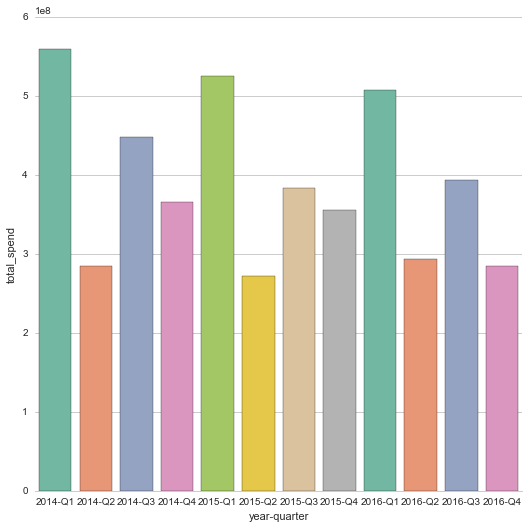

In [113]:
data=pd.DataFrame(result)
data.columns=['fy_year','fy_quarter','year-quarter','total_spend']
sns.set(style = "whitegrid")
g = sns.factorplot(x = 'year-quarter',y='total_spend',data = data,size = 7.5, kind  = 'bar', palette = 'Set2')
g.despine(left = True)

We see that every Quarter1 and Quarter3 of each financial year there is increase in spending and hence we see a trend in the spending by the Austin city government. As there is lot of fluctuation in spending we go ahead and see the %Change in spending per quarter.

#### What is the Quarter on Quarter change in the spend of Austin city?

In [104]:
%%sql

SELECT 
    d.fy_dc
    ,d.fy_quarter
    ,d.fy_dc ||'-' || d.fy_quarter as "year-quarter"
    ,SUM(f.amount) AS "Total Spend" 
    ,CAST(((SUM(f.amount)- LAG(SUM(f.amount)) OVER (ORDER BY d.fy_dc,d.fy_quarter))/LAG(SUM(f.amount)) OVER (ORDER BY d.fy_dc,d.fy_quarter))*100 AS INTEGER) AS "%Change Per Quarter"
FROM FACT_spending f LEFT JOIN DIM_date d
ON f.date_id=d.date_key
GROUP BY d.fy_dc,d.fy_quarter
ORDER BY d.fy_dc,d.fy_quarter;

12 rows affected.


fy_dc,fy_quarter,year-quarter,Total Spend,%Change Per Quarter
2014,Q1,2014-Q1,559883785.39,None
2014,Q2,2014-Q2,284642298.70,-49
2014,Q3,2014-Q3,447861000.75,57
2014,Q4,2014-Q4,365499023.52,-18
2015,Q1,2015-Q1,524747640.50,44
2015,Q2,2015-Q2,271548707.82,-48
2015,Q3,2015-Q3,383701150.70,41
2015,Q4,2015-Q4,355083112.87,-7
2016,Q1,2016-Q1,507861370.61,43
2016,Q2,2016-Q2,293662855.55,-42


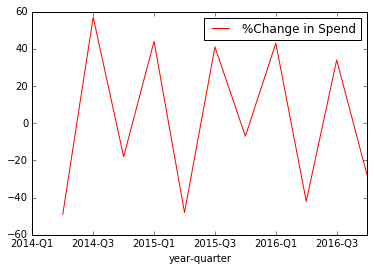

In [105]:
result=_
data=pd.DataFrame(result)
data.columns= ['fy','quarter','year-quarter','Total Spend','%Change in Spend']
data.plot(x='year-quarter',y='%Change in Spend', color='red')

We can see a trend that first and third quarters of each year have high %change in spending when compared to the previous quarter and hence we can assume some seasonality effect. Similarly we see a slump in the amount spent in the second and fourth quarters.

Further drilling down the quarter we look at the monthly behaviour to find the seasonality.

In [141]:
%%sql

SELECT d.fy
    ,d.fy_quarter
    ,d.fy_month
    ,d.fy || '-' || d.fy_month AS "Year-month"
    ,SUM(f.amount)
FROM FACT_spending f LEFT JOIN DIM_date d ON f.date_id=d.date_key
GROUP BY d.fy,d.fy_quarter,d.fy_month
ORDER BY d.fy,d.fy_quarter,to_date(fy_month,'Mon');

36 rows affected.


fy,fy_quarter,fy_month,Year-month,sum
FY14,Q1,OCT,FY14-OCT,130338506.44
FY14,Q1,NOV,FY14-NOV,306771180.57
FY14,Q1,DEC,FY14-DEC,122774098.38
FY14,Q2,JAN,FY14-JAN,82773844.62
FY14,Q2,FEB,FY14-FEB,80949014.44
FY14,Q2,MAR,FY14-MAR,120919439.64
FY14,Q3,APR,FY14-APR,107933955.68
FY14,Q3,MAY,FY14-MAY,239525125.22
FY14,Q3,JUN,FY14-JUN,100401919.85
FY14,Q4,JUL,FY14-JUL,99641448.24


Now we need to store the above query output to a csv file in order to import it to Tableau.

In [92]:
pwd

'/Users/zhaorc/Desktop'

In [140]:
%%sql

COPY(
SELECT d.fy
    ,d.fy_quarter
    ,d.fy_month
    ,d.fy || '-' || d.fy_month AS "Year-month"
    ,SUM(f.amount)
FROM FACT_spending f LEFT JOIN DIM_date d ON f.date_id=d.date_key
GROUP BY d.fy,d.fy_quarter,d.fy_month
ORDER BY d.fy,d.fy_quarter,to_date(fy_month,'Mon')) TO '/Users/zhaorc/Desktop/time_series.csv' CSV HEADER

36 rows affected.


[]

Now plotting the visualization from Tableau.

In [124]:
Image(url = "https://raw.githubusercontent.com/rithvikmundra/istm-6212/master/Project3-Tableau-images/time%20series2.png")

The above graph shows that the spending time series graph follows a perfect trend every financial year. We see that there is a spike in spending in every November and May months of each financial year.

#### Spending per each Department.

#### Second, we want to view yearly spending broadly, by departments which is the the highest orginization level.

In [12]:
%%sql
select distinct o.dept_nm, coalesce(a.sum_amount,0) as sum_2014, coalesce(b.sum_amount,0) as sum_2015, coalesce(c.sum_amount,0)  as sum_2016 
From dim_org o
    LEFT JOIN (select o.dept_cd, sum(f.amount) as sum_amount
    From fact_spending f, dim_org o, dim_date d
    where f.org_id=o.org_key and f.date_id=d.date_key and d.fy_dc = '2014'
    group by d.fy_dc, o.dept_cd, o.dept_nm) a ON a.dept_cd=o.dept_cd
    
    LEFT JOIN (select o.dept_cd, sum(f.amount) as sum_amount
    From fact_spending f, dim_org o, dim_date d
    where f.org_id=o.org_key and f.date_id=d.date_key and d.fy_dc = '2015'
    group by d.fy_dc, o.dept_cd, o.dept_nm) b ON b.dept_cd=o.dept_cd
    
    LEFT JOIN (select o.dept_cd, sum(f.amount) as sum_amount
    From fact_spending f, dim_org o, dim_date d
    where f.org_id=o.org_key and f.date_id=d.date_key and d.fy_dc = '2016'
    group by d.fy_dc, o.dept_cd, o.dept_nm) c ON c.dept_cd=o.dept_cd
    
order by sum_2016 desc
;

46 rows affected.


dept_nm,sum_2014,sum_2015,sum_2016
Enterprise Debt Service,396986784.29,378731720.96,389685656.40
Austin Energy,187801805.69,204958031.27,189611570.42
Austin Water Utility,233396631.51,143013038.71,128804161.59
General Obligation Debt Service,141624150.31,147350005.19,126723709.38
Watershed,89332410.93,69959938.54,80861203.03
Aviation,63209915.39,71439828.92,73974291.80
Public Works - Transportation,92702907.37,59709392.87,52415779.76
Library,25643158.72,42455081.89,43741166.93
Communications & Technology Management,44638562.88,44424583.28,43601529.84
Financial Services,38888185.19,44709562.41,43502497.07


And we are going to see only the top 10 yearly pending proportion by departments using a pie chart. 
To do that, we make the above data as a pandas dataframe, leave only the top 10 and add the others.

In [13]:
result = _
df = result.DataFrame()
df.sum_2014 = df.sum_2014.astype(float)
df.sum_2015 = df.sum_2015.astype(float)
df.sum_2016 = df.sum_2016.astype(float)

In [14]:
df2 = df[:11]
df2.iloc[10, 0]='etc.'
df2.iloc[10, 1]= df[10:]['sum_2014'].sum()
df2.iloc[10, 2]= df[10:]['sum_2015'].sum()
df2.iloc[10, 3]= df[10:]['sum_2016'].sum()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Pulling out the data to panda dataframe, so we can plot it more easily.

We used the plotly to plot our output, and this application required the API key.

In [17]:
fig = {
    'data': [
        {'labels': list(df2['dept_nm']),
        'values': list(df2['sum_2014']),
        'type': 'pie',
        'name': '2014',
        'domain': {'x': [0,.3]
                   #,'y': [0, 5]
                  }
        }, 
        {'labels': list(df2['dept_nm']),
        'values': list(df2['sum_2015']),
        'type': 'pie',
        'name': '2015',
        'domain': {'x': [.35,.65]
                   #,'y': [0, 5]
                  }
        }, 
        {'labels': list(df2['dept_nm']),
        'values': list(df2['sum_2016']),
        'type': 'pie', 
        'name': '2016',
        'domain': {'x': [.7,1]
                   #,'y': [0, 5]
                  }
        }, 
    ],
    'layout': {'title': 'Yearly Spending proportion by department (2014~2016)'}
     }
py.iplot(fig)

Hovering the mouse on the chart, we can the detail information about each part. 

We saw from here that the most of the Austin government's spendings are from Enterprise Dept Service, and adding up Dept service's spending, the spending proportion is greater than 50% for every year. Is it really that the Austin government spend the money only on paying their debt?  

We also can see that Austin Water Utility and Austin Energy departments spend a large parts of the total spending amount which are increasing every year, which might indicate that the Austin government regard water and energy important for the city. But we need to figure out the detailed purpose of the spendings.

#### For each year, we want to see the top 10 vendors that received most money from government.

In [45]:
%%sql

WITH FST AS(
    SELECT DISTINCT v.lgl_nm, SUM(a.amount) as sum_amount_2014, d.fy_dc
    FROM fact_spending a, dim_date d, dim_vendor v
    WHERE a.date_id = d.date_key AND a.vendor_id =v.vendor_key AND d.fy_dc = '2014'
    GROUP BY v.lgl_nm,d.fy_dc
    ORDER BY sum_amount_2014 DESC
    LIMIT 10
    ), SEC AS(
    SELECT DISTINCT v.lgl_nm, SUM(a.amount) as sum_amount_2015,d.fy_dc
    FROM fact_spending a, dim_date d, dim_vendor v
    WHERE a.date_id = d.date_key AND a.vendor_id =v.vendor_key AND d.fy_dc = '2015'
    GROUP BY v.lgl_nm,d.fy_dc
    ORDER BY sum_amount_2015 DESC
    LIMIT 10
    ), THR AS(
    SELECT DISTINCT v.lgl_nm, SUM(a.amount) as sum_amount_2016,d.fy_dc
    FROM fact_spending a, dim_date d, dim_vendor v
    WHERE a.date_id = d.date_key AND a.vendor_id =v.vendor_key AND d.fy_dc = '2016'
    GROUP BY v.lgl_nm,d.fy_dc
    ORDER BY sum_amount_2016 DESC
    LIMIT 10
    ), final AS(
    SELECT f.lgl_nm
        ,f.fy_dc
        ,f.sum_amount_2014
    FROM FST f
    UNION
    SELECT s.lgl_nm
        ,s.fy_dc
        ,s.sum_amount_2015
    FROM SEC s
    UNION 
    SELECT t.lgl_nm
        ,t.fy_dc
        ,t.sum_amount_2016 
    FROM THR t
    )
SELECT 
    n.lgl_nm
    ,n.fy_dc
    ,n.sum_amount_2014 as sum_amount
FROM final n
GROUP BY n.fy_dc,n.lgl_nm,sum_amount
ORDER BY n.fy_dc

30 rows affected.


lgl_nm,fy_dc,sum_amount
BANK OF NEW YORK-EFT,2014,143067422.68
BANK OF OKLAHOMA NA,2014,63920807.97
HENSEL PHELPS CONSTRUCTION CO,2014,48213777.02
HERITAGE TITLE CO OF AUSTIN INC,2014,29614436.26
MWH CONSTRUCTORS INC,2014,82432845.60
REGIONS BANK,2014,25906769.35
TRAVIS COUNTY,2014,23903897.87
U S BANK TRUST N A,2014,138037884.37
WELLS FARGO BANK NA,2014,84662697.26
"Wilmington Trust, National Association",2014,49126571.22


Basically, we created four temporary table to hold three years top 10 vendors and keep 30 vendors to another temporary table. Then, select all records and group them by year from the last temporary table to show the result. 

In [46]:
result=_

In [47]:
df = pd.DataFrame(result,columns = ['name','year','amount'])
df.head()

,name,year,amount
0,BANK OF NEW YORK-EFT,2014,143067422.68
1,BANK OF OKLAHOMA NA,2014,63920807.97
2,HENSEL PHELPS CONSTRUCTION CO,2014,48213777.02
3,HERITAGE TITLE CO OF AUSTIN INC,2014,29614436.26
4,MWH CONSTRUCTORS INC,2014,82432845.60


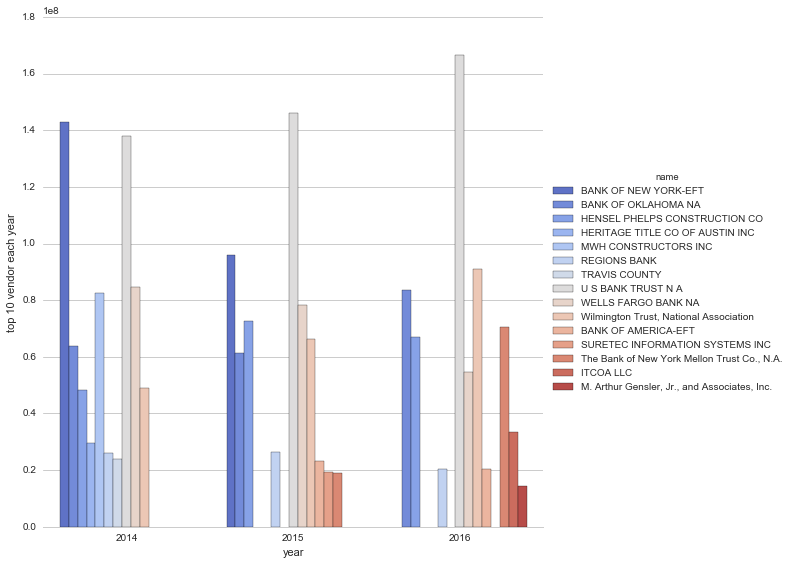

In [48]:
sns.set(style="whitegrid")
g = sns.factorplot(x="year", y="amount", hue="name", data=df,
                   size=8, kind="bar", palette="coolwarm")
g.despine(left=True)
g.set_ylabels("top 10 vendor each year")

Here we are using seaborn package to see the top 10 vendors across three years. We are focusing on fiscal year, which starts from Oct1 to Sept 30.

We found that, most vendors in top 10 list are bank and trusting company, which indicates bank and trusting company may be one of the major sources of fund.

Other than that, we can see from the chart, vendor 'BANK OF NEW YORK-EFT' is the top 3 vendors in 2014 and 2015, but suddenly disappear from the top 10 ranking in 2016.

Furthermore, generally the top 10 vendors in 2014 and 2015 are similar, we can tell from the color coded bar, but in year 2016 'M.Arthur Gensler' and 'UMB BANK N A' are two new vendors that in top 10 ranking.

#### In this query, we want to find out the ranking of fund_type(in a grouped form) that government spent on throughout the 3 years.
Here we use a subquery to select the unique type of fund and then sum up the amount for each type. To show our result in a much more meaningful way, we put it to a pie chart that shows us the composition of fund expenditure.

In [211]:
%%sql

SELECT f.fundgrp_nm, sum(a.amount) as spending_sum
FROM fact_spending a, dim_fund f
WHERE a.fund_id = f.fund_key
AND f.fundgrp_nm in 
(SELECT distinct f.fundgrp_nm
from dim_fund f
)

GROUP BY f.fundgrp_nm
ORDER BY spending_sum DESC;

136 rows affected.


fundgrp_nm,spending_sum
General Fund,666027322.30
AWU Debt Service Fund,579158367.00
GCP,441846012.59
AE Debt Service Fund,339709606.91
Austin related Fund,330631390.55
Water related Fund,321995632.02
Airport related fund,152620656.09
Support Services Fund,150034980.55
E-Distribution Capital,109721858.19
Electric Inventory Fund,92111682.97


In [212]:
result = _
df = result.DataFrame()
df.spending_sum = df.spending_sum.astype(float)

In [213]:
df2 = df[:11]
df2.iloc[10, 0]= 'other'
df2.iloc[10, 1]= df[10:]['spending_sum'].sum()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [218]:
fig = {
    'data': [
        {
            'labels': df2['fundgrp_nm'],
            'values': df2['spending_sum'],
            'type': 'pie',
            'name': 'Fund by',
            'marker': {'colors': ['rgb(238, 239, 255)',
                                  'rgb(252, 234, 187)',
                                  'rgb(193, 192, 125)',
                                  'rgb(252, 190, 193)',
                                  'rgb(165, 163, 160)',
                                  'rgb(206, 192, 187)',
                                 'rgb(206, 202, 200)',
                                 'rgb(194, 157, 200)',
                                 'rgb(163,200,157)',
                                 'rgb(173,157,200)',
                                 'rgb(173, 216, 230)']},
            'domain': {'x': [0, 1],
                       'y': [0, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':df2['fundgrp_nm']
        },
        
    ],
    'layout': {'title': 'Spending proportion by fund type',
               'showlegend': True}
}
py.iplot(fig)

### Item Analysis
For each financial year we want to find the top 10 Items with the department names under which they are used.

In [108]:
%%sql

WITH data_2014 AS (
SELECT
     d.fy_dc
    ,f.description ||'-'|| o.dept_nm AS "Item Name - Department"
    ,COUNT(f.description)
FROM fact_spending f 
LEFT JOIN DIM_org o ON f.org_id=o.org_key
LEFT JOIN DIM_date d on f.date_id=d.date_key
WHERE d.fy_dc='2014'
GROUP BY d.fy_dc,f.description,o.dept_nm
ORDER BY count(description) DESC
limit 10),
data_2015 AS(
SELECT
     d.fy_dc
    ,f.description ||'-'|| o.dept_nm AS "Item Name - Department"
    ,COUNT(f.description)
FROM fact_spending f 
LEFT JOIN DIM_org o ON f.org_id=o.org_key
LEFT JOIN DIM_date d on f.date_id=d.date_key
WHERE d.fy_dc='2015'
GROUP BY d.fy_dc,f.description,o.dept_nm
ORDER BY count(description) DESC
limit 10),
data_2016 AS(
SELECT
     d.fy_dc
    ,f.description ||'-'|| o.dept_nm AS "Item Name - Department" 
    ,COUNT(f.description)
FROM fact_spending f 
LEFT JOIN DIM_org o ON f.org_id=o.org_key
LEFT JOIN DIM_date d on f.date_id=d.date_key
WHERE d.fy_dc='2016'
GROUP BY d.fy_dc,f.description,o.dept_nm
ORDER BY count(description) DESC
limit 10
), final_data AS(

SELECT * FROM data_2014
UNION
SELECT * FROM data_2015
UNION
SELECT * FROM data_2016
)


SELECT * from final_data
ORDER BY fy_dc,count DESC;

30 rows affected.


fy_dc,Item Name - Department,count
2014,Electrical-Austin Energy,2183
2014,Mileage reimbursements-Health & Human Services,1549
2014,Mileage reimbursements-Parks & Recreation,1530
2014,"Shoes, Safety Toe-Solid Waste Services",1393
2014,"Telephone Services, Long Distance and Local (Inclu-Parks & Recreation",1353
2014,Copy Machine (Including Cost-Per-Copy Type Leases)-Fleet Services,1324
2014,TEMPORARY SERVICES FOR THE EMPLOYMENT OF COMPUTER PROGRAMMER-Austin Energy,1300
2014,"ASPHALTIC CONCRETE, HOT MIX, IN ACCORDANCE WITH IT-Public Works - Transportation",1166
2014,Mileage reimbursements-Library,1101
2014,"Impact Tools, Air Powered (Not Road Building)-Austin Water Utility",1097


Here we have created a combined data table to store top 10 items for each year which are being bought/serviced by different departments. We wanted to analyze the items which the departments under Austin city government bought/serviced with the tax payer's money.

In [109]:
result=_
data=pd.DataFrame(result,columns=['Year','Item Name - Department','Count'])

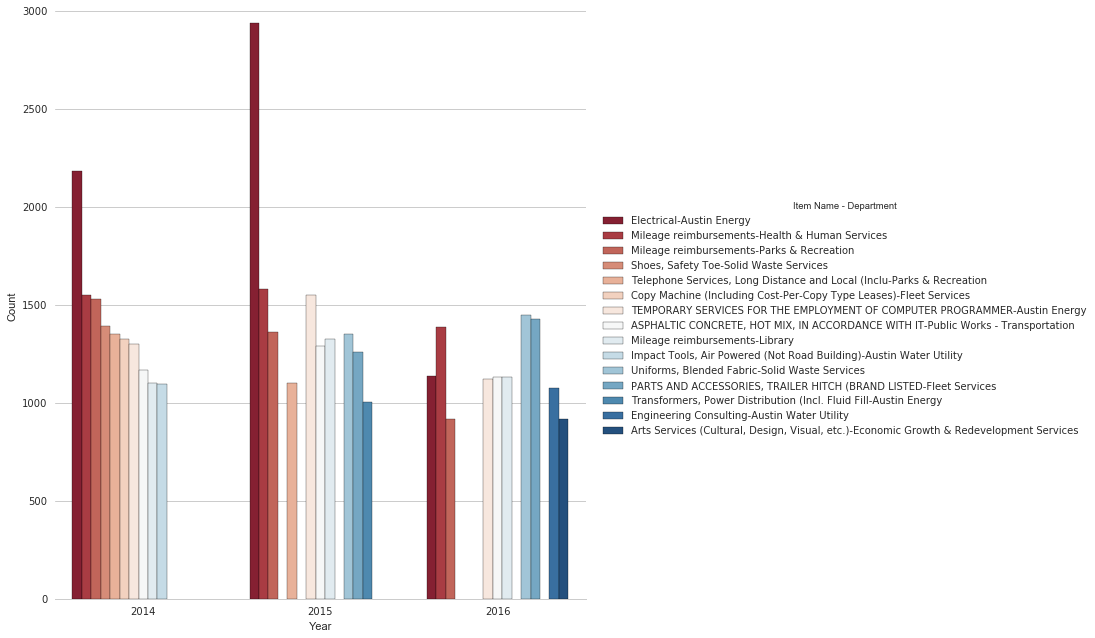

In [113]:
sns.set(style='whitegrid')
graph=sns.factorplot(x="Year",y="Count",hue="Item Name - Department",data=data,kind="bar",size=9,palette="RdBu")
graph.despine(left=True)

We see that in years 2014 and 2015 departments under Austin City Government bought/serviced Electrical items many number of times. Whereas in 2016 the count for Electrical items is less but new spending areas such as "Arts Services" and "Engineering consulting" have come up. We can also infer that the government is doing lot of Mileage reimbursements in all the 3 financial years. 

#### For each financial year we want to find the top 10 Items on which the Austin city Government spent the most.

In [114]:
%%sql

WITH spend_data_2014 AS (
SELECT
     d.fy_dc
    ,f.description ||'-'|| o.dept_nm AS "Item Name - Department"
    ,SUM(f.amount)
FROM fact_spending f 
LEFT JOIN DIM_org o ON f.org_id=o.org_key
LEFT JOIN DIM_date d on f.date_id=d.date_key
WHERE d.fy_dc='2014'
GROUP BY d.fy_dc,f.description,o.dept_nm
ORDER BY SUM(f.amount) DESC
limit 10),
spend_data_2015 AS(
SELECT
     d.fy_dc
    ,f.description ||'-'|| o.dept_nm AS "Item Name - Department"
    ,SUM(f.amount)
FROM fact_spending f 
LEFT JOIN DIM_org o ON f.org_id=o.org_key
LEFT JOIN DIM_date d on f.date_id=d.date_key
WHERE d.fy_dc='2015'
GROUP BY d.fy_dc,f.description,o.dept_nm
ORDER BY SUM(f.amount) DESC
limit 10),
spend_data_2016 AS(
SELECT
     d.fy_dc
    ,f.description ||'-'|| o.dept_nm AS "Item Name - Department" 
    ,SUM(f.amount)
FROM fact_spending f 
LEFT JOIN DIM_org o ON f.org_id=o.org_key
LEFT JOIN DIM_date d on f.date_id=d.date_key
WHERE d.fy_dc='2016'
GROUP BY d.fy_dc,f.description,o.dept_nm
ORDER BY SUM(f.amount) DESC
limit 10
), final_spend_data AS(

SELECT * FROM spend_data_2014
UNION
SELECT * FROM spend_data_2015
UNION
SELECT * FROM spend_data_2016
)


SELECT * from final_spend_data
ORDER BY fy_dc,SUM DESC;

30 rows affected.


fy_dc,Item Name - Department,sum
2014,Principal payment D/S funds-Enterprise Debt Service,207756213.50
2014,Interest payment D/S funds-Enterprise Debt Service,184471359.24
2014,Civil Engineering-Austin Water Utility,91585149.41
2014,Redemption of principal-gen-General Obligation Debt Service,88475000.00
2014,Interest-general-General Obligation Debt Service,52124305.68
2014,Real Estate: Land and Improvements-Watershed,36002395.01
2014,"CONSTRUCTION, REMODEL & ALTERA-Aviation",27115523.49
2014,"Construction, Water System, Main and Service Line-Austin Water Utility",22386627.72
2014,"Construction, Pipeline-Austin Water Utility",19195836.44
2014,"Incentives, Rebates and Refunds-Economic Growth & Redevelopment Services",19073572.50


In [115]:
result=_
data=pd.DataFrame(result,columns=['Year','Item Name - Department','Amount'])

Here we have created a combined data table to store the amount spent on top 10 items for each year which are being bought/serviced by different departments. We wanted to analyze the amounts spent on items which the departments under Austin city government bought/serviced with the tax payer's money.

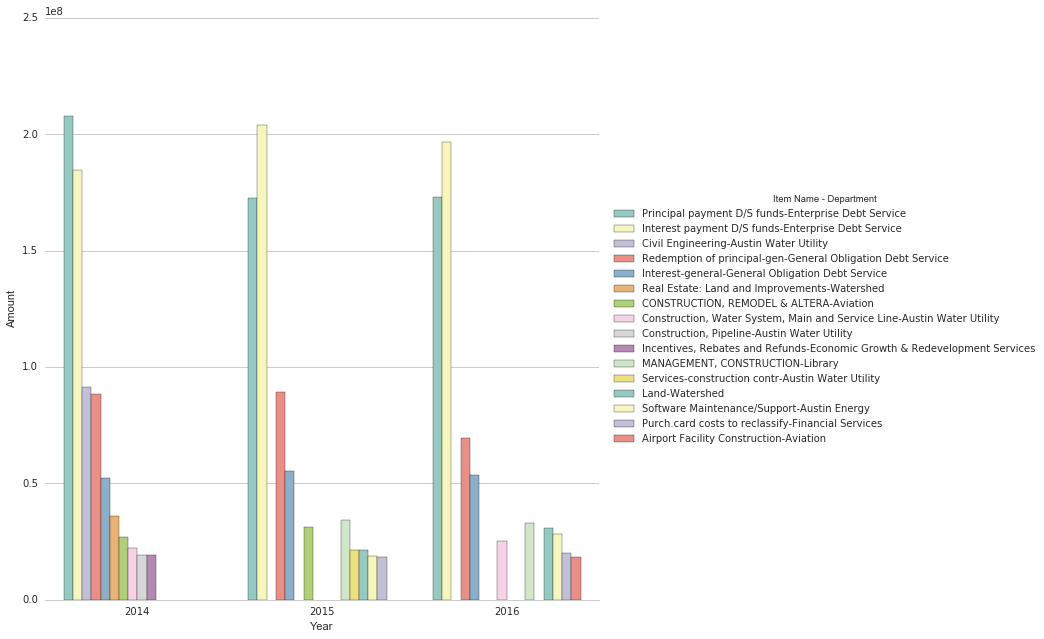

In [118]:
sns.set(style='whitegrid')
graph=sns.factorplot(x="Year",y="Amount",hue="Item Name - Department",data=data,kind="bar",size=9,palette="Set3")
graph.despine(left=True)

We see that for each financial year most of the Tax payer's money is spent on paying the Principal and Interest amounts for the previous debts. In the year 2016 we see that the amount is spent on new items like "Software Maintenance", "Purch card costs" and "Airport Facility Construction".

#### In the following query, we are doing a similar analysis, but this time, we want to see the top 10 objects that government spent most on, in a grouped form.

To go into deeper, we want to see the trend of how the spending amount changed across three years. First, we start from a subquery that sums up the amount which meets the requirement of being in a specific year and has a distinct grouped obj name. And then we use the object code to join the three-year subqueries to one, and sum the amount of each year for same group, for example, from the subquery we mentioned earlier, some groups with same object name are recorded separately. We want to add them as one. After that, for each group we get the total amount across three years and using the total amount to get the top 10 groups. Finally, plot it.

In [207]:
%%sql
WITH spdobj AS(
select distinct o.objgrp_nm, coalesce(a.sum_amount,0) as sum_2014, coalesce(b.sum_amount,0) as sum_2015, coalesce(c.sum_amount,0)  as sum_2016 
From dim_obj o
    LEFT JOIN (select o.obj_cd, o.objgrp_nm, sum(f.amount) as sum_amount
    From fact_spending f, dim_obj o, dim_date d
    where f.obj_id=o.obj_key and f.date_id=d.date_key and d.fy_dc = '2014'
               AND o.objgrp_nm in (SELECT DISTINCT o.objgrp_nm from dim_obj o)
    group by d.fy_dc, o.obj_cd, o.objgrp_nm) a ON a.obj_cd=o.obj_cd
    
    LEFT JOIN (select o.obj_cd, o.objgrp_nm, sum(f.amount) as sum_amount
    From fact_spending f, dim_obj o, dim_date d
    where f.obj_id=o.obj_key and f.date_id=d.date_key and d.fy_dc = '2015'
                AND o.objgrp_nm in (SELECT DISTINCT o.objgrp_nm from dim_obj o)
    group by d.fy_dc, o.obj_cd, o.objgrp_nm) b ON b.obj_cd=o.obj_cd
    
    LEFT JOIN (select o.obj_cd, o.objgrp_nm, sum(f.amount) as sum_amount
    From fact_spending f, dim_obj o, dim_date d
    where f.obj_id=o.obj_key and f.date_id=d.date_key and d.fy_dc = '2016'
                AND o.objgrp_nm in (SELECT DISTINCT o.objgrp_nm from dim_obj o)
    group by d.fy_dc, o.obj_cd, o.objgrp_nm) c ON c.obj_cd=o.obj_cd)

SELECT  s.objgrp_nm
        ,sum(sum_2014) as sum2014
        ,sum(sum_2015) as sum2015
        ,sum(sum_2016) as sum2016
        ,COALESCE(sum(sum_2014),0) + COALESCE(sum(sum_2015),0) + COALESCE(sum(sum_2016),0) AS sum_three
FROM spdobj s 
group by s.objgrp_nm
order by sum_three DESC
LIMIT 10
;

10 rows affected.


objgrp_nm,sum2014,sum2015,sum2016,sum_three
Services,594160666.03,479898297.86,433612412.46,1507671376.35
Interest,237644639.02,261760133.09,252539842.68,751944614.79
Principal payment D/S funds,208586213.50,173725722.20,174024425.36,556336361.06
Redemption of principal-gen,90180000.00,91330000.00,71655000.00,253165000.00
Grant Related,65189698.52,65710476.33,67685451.37,198585626.22
Inventory purchases,64028544.60,54018279.64,48413971.43,166460795.67
Land,61761195.44,39035480.30,42797765.16,143594440.90
Maintenance,43096804.69,45059110.81,48834743.51,136990659.01
Purch.card costs to reclassify,35969474.71,40593741.14,42535172.25,119098388.10
Vehicle/Motored Equipment,23572343.86,41015872.98,27959687.01,92547903.85


In [208]:
result = _
df = result.DataFrame()
df.sum_2014 = df.sum2014.astype(float)
df.sum_2015 = df.sum2015.astype(float)
df.sum_2016 = df.sum2016.astype(float)
df

,objgrp_nm,sum2014,sum2015,sum2016,sum_three
0,Services,594160666.03,479898297.86,433612412.46,1507671376.35
1,Interest,237644639.02,261760133.09,252539842.68,751944614.79
2,Principal payment D/S funds,208586213.50,173725722.20,174024425.36,556336361.06
3,Redemption of principal-gen,90180000.00,91330000.00,71655000.00,253165000.00
4,Grant Related,65189698.52,65710476.33,67685451.37,198585626.22
5,Inventory purchases,64028544.60,54018279.64,48413971.43,166460795.67
6,Land,61761195.44,39035480.30,42797765.16,143594440.90
7,Maintenance,43096804.69,45059110.81,48834743.51,136990659.01
8,Purch.card costs to reclassify,35969474.71,40593741.14,42535172.25,119098388.10
9,Vehicle/Motored Equipment,23572343.86,41015872.98,27959687.01,92547903.85


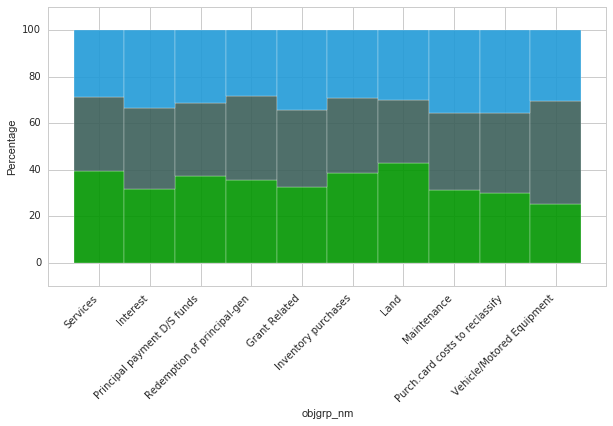

In [210]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['sum2014']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(df['sum2014'], df['sum2015'], df['sum2016'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(df['sum2014'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(df['sum2015'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(df['sum2016'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='sum_2014', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#019600',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='sum_2015', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#3C5F5A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       post_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       # labeled 
       label='sum_2016',
       # with alpha
       alpha=0.9, 
       # with color
       color='#219AD8', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['objgrp_nm'])
ax.set_ylabel("Percentage")
ax.set_xlabel("objgrp_nm")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

What we can see from the above stacked percentage bar plot is the proportional difference between 3 years grouped by the top 10 purchased items. The lowest proportion highlighted as green, represents the year of 2014, while the dark green one represents the 2015, and the blue as 2016. As we can see that for most of the items, except for the fact that year 2015, it takes a relatively small proportion, there are not much difference between the spending distribution of the three years. Other than that, the ones that the Austin government spent most on is service and still, the debt-related objects such as interest and principal payments.

### Outstanding checks - Analysis

In [12]:
%%sql

SELECT 
    o.dept_nm
    ,COUNT(f.check_status)
FROM FACT_spending f LEFT JOIN DIM_org o ON f.org_id=o.org_key
WHERE f.check_status='Outstanding'
GROUP BY o.dept_nm
ORDER BY COUNT(f.check_status) DESC
LIMIT 10;

10 rows affected.


dept_nm,count
Enterprise Debt Service,1414
Austin Energy,1328
Austin Water Utility,1055
General Obligation Debt Service,547
Fleet Services,505
Public Works - Transportation,459
Parks & Recreation,431
Solid Waste Services,381
Financial Services,381
Health & Human Services,365


Now storing the above query to a csv file in order to perform visualization in Tableau.

In [ ]:
%%sql

COPY (
SELECT 
    o.dept_nm
    ,COUNT(f.check_status)
FROM FACT_spending f LEFT JOIN DIM_org o ON f.org_id=o.org_key
WHERE f.check_status='Outstanding'
GROUP BY o.dept_nm
ORDER BY COUNT(f.check_status) DESC
LIMIT 10) TO '/home/rithvik/datamanagement/final_proj/chk_status.csv' CSV HEADER

In [13]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url = "https://raw.githubusercontent.com/rithvikmundra/istm-6212/master/Project3-Tableau-images/chk_outstanding.png")

From the above query we can see that "Enterprise Debt Services","Austin Energy" & "Austin Water Utility" have the highest number of outstanding checks. By seeing the number of outstanding checks we feel like we can prescribe this information to the Austin city government so that it can take appropriate measures to curb the number of outstanding checks.

### Bonus

#### We choose the Budget data for Austin government, the data we analysis so far is spending data. So it may bring more insights if we combine budget dataset and spending dataset. 

We download the data from
https://data.austintexas.gov/Financial/Program-Budget-Operating-Budget-Vs-Expense-Raw-Dat/g5k8-8sud.

In [38]:
!wget https://data.austintexas.gov/api/views/g5k8-8sud/rows.csv?accessType=DOWNLOAD

--2016-12-08 15:28:08--  https://data.austintexas.gov/api/views/g5k8-8sud/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov... 52.206.140.199
Connecting to data.austintexas.gov|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [           <=>      ]  11.79M  2.59MB/s    in 4.7s    

Last-modified header invalid -- time-stamp ignored.
2016-12-08 15:28:13 (2.52 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [12366996]



In [39]:
!mv rows.csv?accessType=DOWNLOAD budget_original.csv

In [40]:
!csvcut -n budget_original.csv

  1: BUDGET_FISCAL_YEAR
  2: THRU_QUARTER
  3: DEPT_ROLLUP
  4: DEPT_ROLLUP_NAME
  5: DEPARTMENT_CODE
  6: DEPARTMENT_NAME
  7: FUND_CODE
  8: FUND_NAME
  9: PROGRAM_CODE
 10: PROGRAM_NAME
 11: ACTIVITY_CODE
 12: ACTIVITY_NAME
 13: UNIT_CODE
 14: UNIT_NAME
 15: EXPENSE_CODE
 16: EXPENSE_NAME
 17: BUDGET
 18: EXPENDITURES
 19: KEY


We are only interested in the budget, so we delete the columns that related to expense. 

In [51]:
!csvcut -c 1,2,3,4,7,8,9,10,11,12,17,19 budget_original.csv > budget.csv 

In [52]:
!csvcut -n budget.csv

  1: BUDGET_FISCAL_YEAR
  2: THRU_QUARTER
  3: DEPT_ROLLUP
  4: DEPT_ROLLUP_NAME
  5: FUND_CODE
  6: FUND_NAME
  7: PROGRAM_CODE
  8: PROGRAM_NAME
  9: ACTIVITY_CODE
 10: ACTIVITY_NAME
 11: BUDGET
 12: KEY


As a result, we got 12 columns in our new table. 

In [53]:
!csvstat budget.csv

  1. BUDGET_FISCAL_YEAR
	<class 'int'>
	Nulls: False
	Values: 2016
  2. THRU_QUARTER
	<class 'int'>
	Nulls: False
	Values: 3
  3. DEPT_ROLLUP
	<class 'int'>
	Nulls: False
	Min: 11
	Max: 94
	Sum: 3018699
	Mean: 57.43448315226698
	Median: 63
	Standard Deviation: 29.02914573350911
	Unique values: 46
	5 most frequent values:
		22:	6329
		86:	6174
		11:	5807
		87:	4558
		63:	2045
  4. DEPT_ROLLUP_NAME
	<class 'str'>
	Nulls: False
	Unique values: 46
	5 most frequent values:
		Austin Water Utility:	6329
		Parks & Recreation:	6174
		Austin Energy:	5807
		Police:	4558
		Watershed:	2045
	Max length: 40
  5. FUND_CODE
	<class 'str'>
	Nulls: False
	Unique values: 145
	5 most frequent values:
		1000:	18199
		5010:	5786
		5150:	5246
		5020:	3339
		5030:	2915
	Max length: 4
  6. FUND_NAME
	<class 'str'>
	Nulls: False
	Unique values: 145
	5 most frequent values:
		General Fund:	18199
		Austin Energy Fund:	5786
		Support Services Fund:	5246
		Water Utility Operating Fund:	3339
		Wastewater Utility Oper

In [11]:
Image(url = "https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/Rongchu-Zhao/master/DM/STARSCHEMA9th%20(1).png")

This is our new star schema after we added new data set.

In [77]:
%%sql

DROP TABLE IF EXISTS budget;
CREATE TABLE budget(
        budget_fiscal_year INTEGER
        ,thru_quarter INTEGER
        ,dept_rollup INTEGER 
        ,dept_rollup_name VARCHAR(50)
        ,fund_code VARCHAR(20)
        ,fund_name VARCHAR(70)
        ,program_code VARCHAR(20)
        ,program_name VARCHAR(60)
        ,activity_code VARCHAR(20)
        ,activity_name VARCHAR(65)
        ,budget MONEY
        ,key VARCHAR(40)
);

Done.
Done.


[]

Creating the budget table to hold the original data.

In [119]:
pwd

'/Users/zhaorc/Desktop'

In [79]:
%%sql

COPY budget FROM '/Users/zhaorc/Desktop/budget.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

52559 rows affected.


[]

Loading data to the table. 

In [80]:
%%sql 

SELECT * FROM budget 
LIMIT 10;

10 rows affected.


budget_fiscal_year,thru_quarter,dept_rollup,dept_rollup_name,fund_code,fund_name,program_code,program_name,activity_code,activity_name,budget,key
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,"$210,000.00",2016311110050101PSM1GEN13075590
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,"$2,000.00",2016311110050101PSM1GEN13075730
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,"$70,000.00",2016311110050101PSM1GEN13075860
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,"$20,000.00",2016311110050101PSM1GEN13076236
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,"$20,000.00",2016311110050101PSM1GEN13076383
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,$0.00,2016311110050101PSM1GEN13076388
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,$0.00,2016311110050101PSM1GEN13076450
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,"$40,000.00",2016311110050101PSM1GEN13076633
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,"$2,000.00",2016311110050101PSM1GEN13076843
2016,3,11,Austin Energy,5010,Austin Energy Fund,1PSM,Power Supply & Market Operations,1GEN,Power Production,$0.00,2016311110050101PSM1GEN13078502


Checking the table that we created. 

In [92]:
%%sql

DROP TABLE IF EXISTS budget_date;
CREATE TABLE budget_date AS(
    SELECT DISTINCT budget_fiscal_year,thru_quarter FROM budget)

Done.
1 rows affected.


[]

Although the data we got is only including the third quarter in 2016, we put it in to one dimension. Because in the future we will get more date data, so we think it would be more reasonable to keep it as one dimension.

In [93]:
%%sql

ALTER TABLE budget_date
ADD COLUMN budget_date_key SERIAL PRIMARY KEY;

Done.


[]

In [5]:
%%sql

DROP TABLE IF EXISTS fact_budget;
CREATE TABLE fact_budget (
    fact_id SERIAL PRIMARY KEY
    ,date_id INTEGER
    ,fund_id INTEGER
    ,org_id INTEGER
    ,budget_amount MONEY
);

Done.
Done.


[]

In [6]:
%%sql

INSERT INTO FACT_BUDGET(date_id,org_id,fund_id,budget_amount)
SELECT bd.budget_date_key
       ,o.org_key
       ,f.fund_key
       ,b.budget
FROM budget b
LEFT JOIN budget_date bd ON b.budget_fiscal_year = bd.budget_fiscal_year
LEFT JOIN dim_org o ON b.activity_code = o.gp_cd and b.activity_name = o.gp_nm and b.program_name = o.div_nm and b.program_code = o.div_cd and b.dept_rollup_name = o.dept_nm
LEFT JOIN dim_fund f ON b.fund_code = f.fund_cd and b.fund_name = f.fund_nm;

52559 rows affected.


[]

In [99]:
%%sql

SELECT * FROM fact_budget
LIMIT 10

10 rows affected.


fact_id,date_key,fund_key,org_key,budget_amount
1,1,19,24,"$3,923,359.00"
2,1,19,24,"-$7,116,040.00"
3,1,19,24,"$18,000.00"
4,1,19,24,"$4,900.00"
5,1,19,24,"$85,000.00"
6,1,19,24,"$2,200,000.00"
7,1,19,24,$0.00
8,1,19,24,"$60,000.00"
9,1,19,24,"$50,000.00"
10,1,19,24,"$45,000.00"


Checking the budget fact table that we just created. 

In [7]:
%%sql

ALTER TABLE fact_budget
ADD CONSTRAINT fund_fk
FOREIGN KEY (fund_id) REFERENCES DIM_fund
ON DELETE CASCADE;

Done.


[]

In [8]:
%%sql

ALTER TABLE fact_budget
ADD CONSTRAINT org_fk
FOREIGN KEY (org_id) REFERENCES dim_org
ON DELETE CASCADE;

Done.


[]

In [9]:
%%sql

ALTER TABLE FACT_budget
ADD CONSTRAINT date_fk
FOREIGN KEY (date_id) REFERENCES budget_date
ON DELETE CASCADE;

Done.


[]

#### We want to compare the Budget and the spending for each of the Departments under the Austin city Government.

#### Now performing Analysis on how much Budget the each department has and how much each of the department is spending in the Quarter 3 of Financial year 2016.
We look at the top 10 departments with highest budget.

In [25]:
%%sql

SELECT 
    o.dept_nm
    ,CAST(SUM(fb.budget_amount) AS NUMERIC)AS "Budget"
    ,CAST(SUM(fs.amount) AS NUMERIC) AS "Spending"
    
    
FROM FACT_spending fs 
JOIN FACT_budget fb ON fs.org_id=fb.org_id
LEFT JOIN DIM_org o ON o.org_key=fs.org_id 
LEFT JOIN DIM_date d ON fs.date_id=d.date_key
WHERE d.fy_dc=2016 AND d.fy_quarter='Q3'

GROUP BY o.dept_nm
ORDER BY SUM(fb.budget_amount) DESC
LIMIT 10;

10 rows affected.


dept_nm,Budget,Spending
Austin Energy,145102504401.00,27981961731.03
Enterprise Debt Service,61003261650.00,4247045086.53
Austin Water Utility,51435223473.00,3493453297.63
Fire,31698889137.00,194184375.25
Police,30260581581.00,1070106083.82
Emergency Medical Services,10701165653.00,379361867.21
Communications & Technology Management,9407954271.00,1314591219.55
Parks & Recreation,9230450744.00,808466142.06
Fleet Services,9173824132.00,1221157011.90
Public Works - Transportation,7143949267.00,671627114.32


In [26]:
result=_
data=pd.DataFrame(result,columns=['Department','Budget','Spending'])

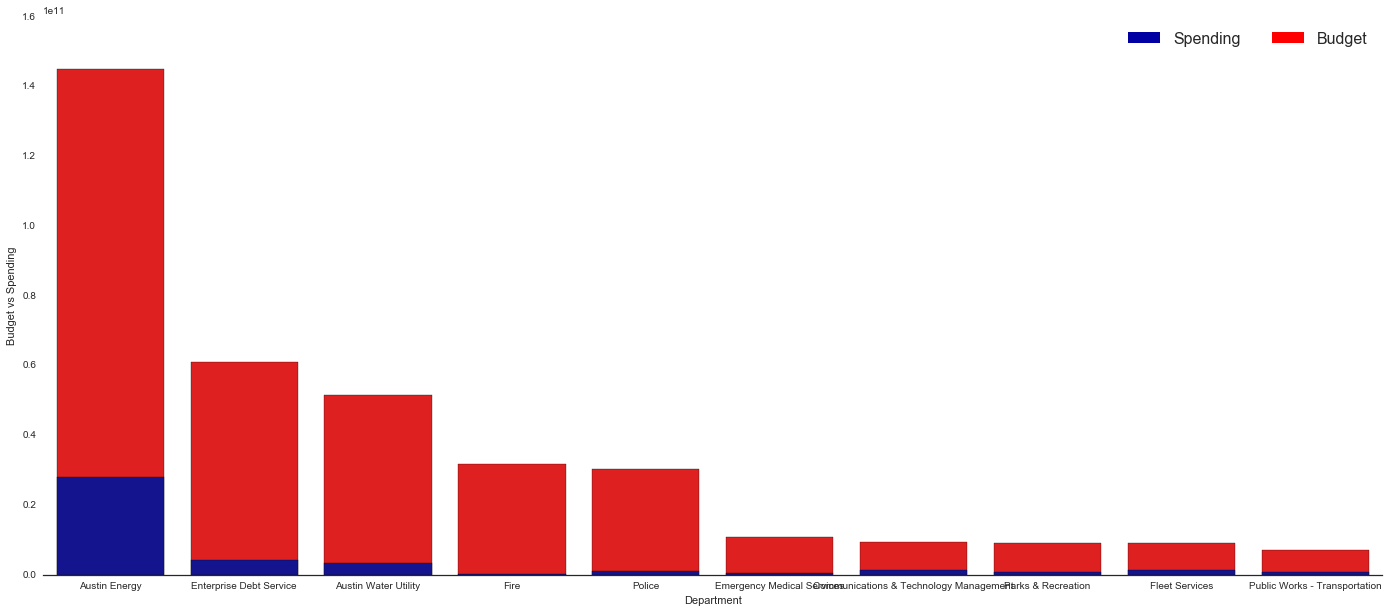

In [27]:
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
sns.barplot(x = 'Department', y = 'Budget',data=data, color = "red")
bottom_plot = sns.barplot(x = 'Department', y = 'Spending', data=data,color = "#0000A3")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Spending', 'Budget'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
sns.despine(left=True)
bottom_plot.set_ylabel("Budget vs Spending")
bottom_plot.set_xlabel("Department")

The first thing we realized from our budget and expense comparison is that the government is preparing higher budget and did not spend that much for the actual expense. The spending is less when compared to the estimated budget.

#### EACH OF THE TEAM MEMBER CONTRIBUTED EQUALLY FOR THE PROJECT. WE ALWAYS MET AND WORKED AS A TEAM THROUGHOUT THE PROJECT.

#### THANK YOU